# Working with data 2017. Class 3
## Contact
Javier Garcia-Bernardo
garcia@uva.nl

## 0. Structure
1. Data visualization theory
    - Scatter
    - Histograms, violinplots and two histograms (jointplot)
    - Line plots with distributions (factorplot)
    - Paralell coordinates    


In [76]:
##Some code to run at the beginning of the file, to be able to show images in the notebook
##Don't worry about this cell

#Print the plots in this screen
%matplotlib inline 

#Be able to plot images saved in the hard drive
from IPython.display import Image 

#Make the notebook wider
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:90% !important; }</style>"))

import seaborn as sns
import pylab as plt
import pandas as pd
import numpy as np

def read_our_csv():
    #reading the raw data from oecd
    df = pd.read_csv("../../wwd2017/class2/data/CITIES_19122016195113034.csv",sep="\t")

    #fixing the columns (the first one is ""METRO_ID"" instead of "METRO_ID")
    cols = list(df.columns)
    cols[0] = "METRO_ID"
    df.columns = cols
    
    #pivot the table
    column_with_values = "Value"
    column_to_split = ["VAR"]
    variables_already_present = ["METRO_ID","Metropolitan areas","Year"]
    df_fixed = df.pivot_table(column_with_values,
                 variables_already_present,
                 column_to_split).reset_index()
    
    return df_fixed
    

# 2 Data visualization: A picture is worth a thousand words

Why do we visualize information?
- It's easier to read than a table
- We use it to:
    - Communicate information
    - Support our points

## 2.1 Example: Datasaurus

In [77]:
df = pd.read_csv("../../../class_data/DatasaurusDozen.tsv",sep="\t")

#Print some statistics (this line is overcomplicated to avoid showing too much info)
stats = pd.concat([df.groupby("dataset").mean(),df.groupby("dataset").std()],axis=1)
stats.columns = ["Mean_x","Mean_y","Std_x","Std_y"]
stats

,Mean_x,Mean_y,Std_x,Std_y
dataset,,,,
away,54.266100,47.834721,16.769825,26.939743
bullseye,54.268730,47.830823,16.769239,26.935727
circle,54.267320,47.837717,16.760013,26.930036
dino,54.263273,47.832253,16.765142,26.935403
dots,54.260303,47.839829,16.767735,26.930192
h_lines,54.261442,47.830252,16.765898,26.939876
high_lines,54.268805,47.835450,16.766704,26.939998
slant_down,54.267849,47.835896,16.766759,26.936105
slant_up,54.265882,47.831496,16.768853,26.938608


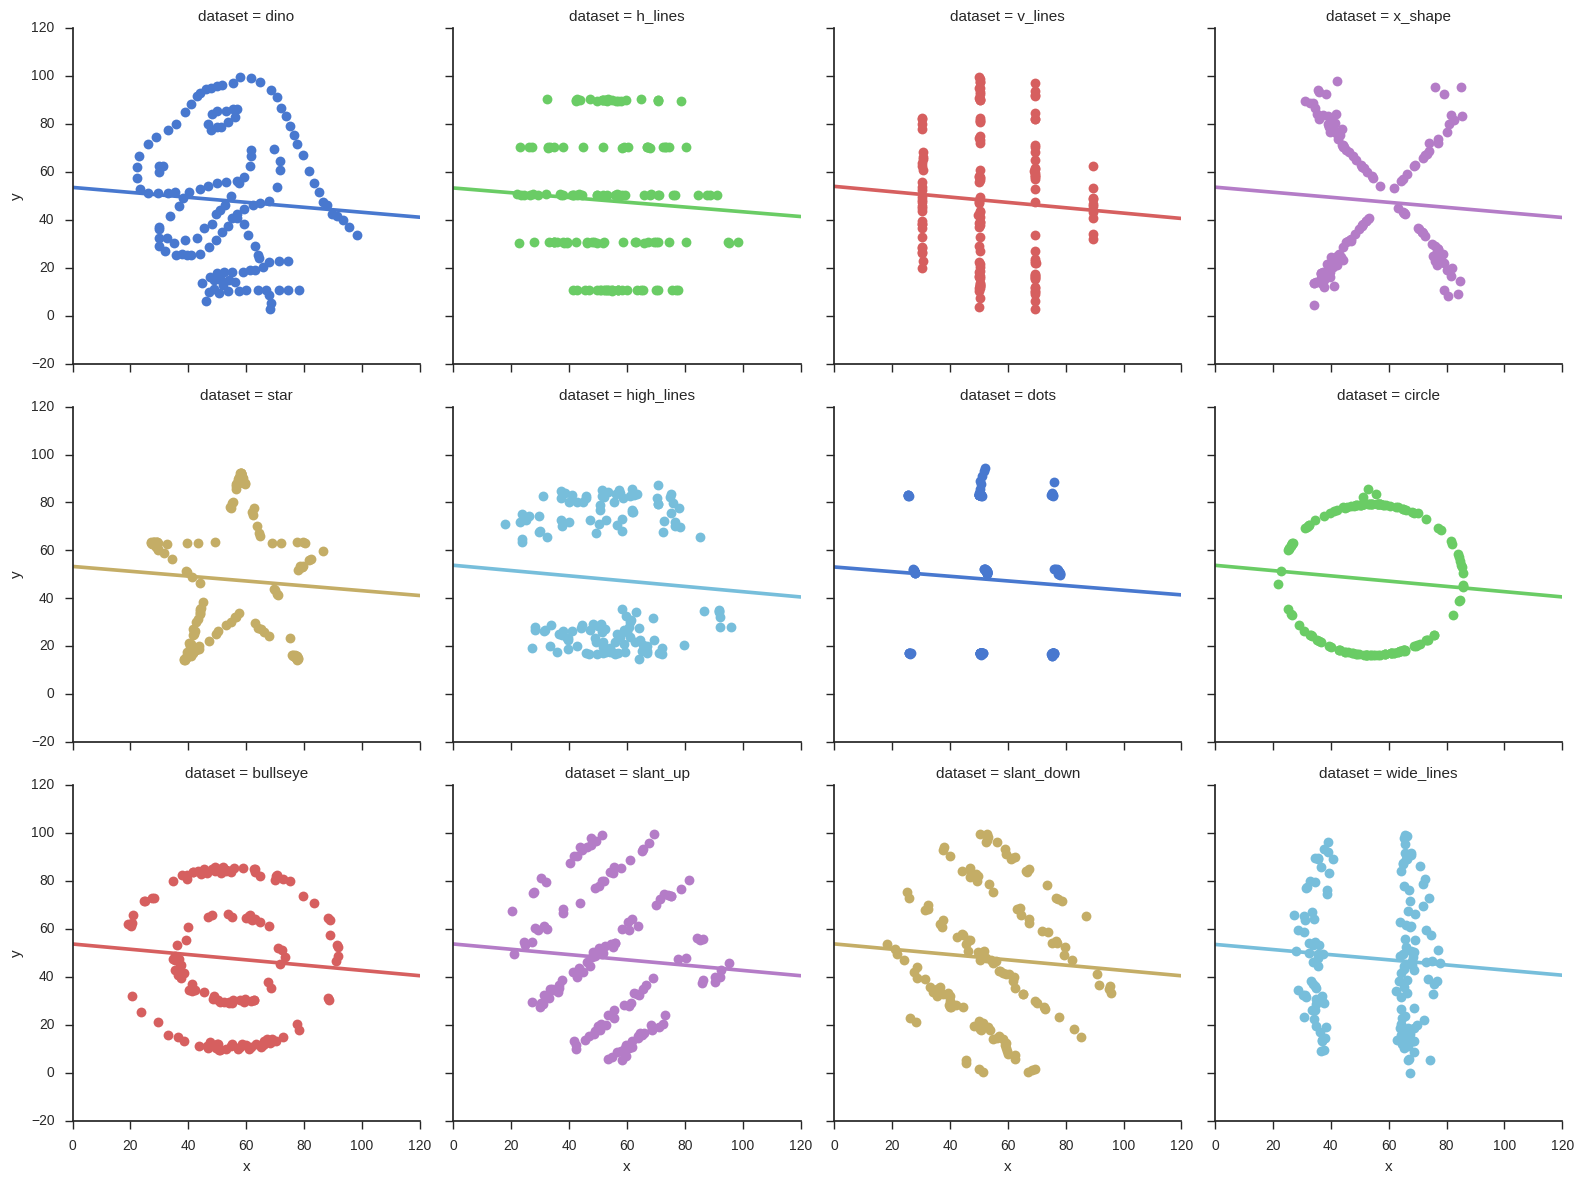

In [78]:
sns.set(style="ticks")
#Delete a dataset to have 12 instead of 13
df = df.loc[df["dataset"]!="away"]
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=4, ci=None, palette="muted", size=4, 
           scatter_kws={"s": 50, "alpha": 1})

## 2.2 Principles of data visualization for quantitative information
- You can use different channels

- Some channels are easily interpreted by our brain

- Some can be combined better than others

### 2.2.1 Channels to map information in a figure

In [79]:
#From http://www.cs171.org/2015/assets/slides/05-marks_channels.pdf
Image(url="images/channels.png",width=1000)

### 2.2.2 Relative errors of different channels

In [80]:
#From http://www.cs171.org/2015/assets/slides/05-marks_channels.pdf
Image(url="images/cleveland.png",width=1000)

In [81]:
#https://en.wikipedia.org/wiki/Stevens'_power_law
#From http://www.cs171.org/2015/assets/slides/05-marks_channels.pdf
Image(url="images/steven.png",width=500)

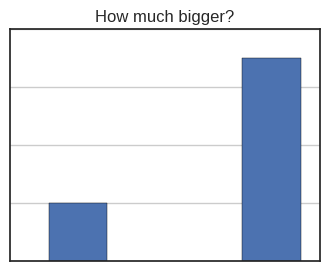

In [82]:
plt.figure(figsize=(4,3))
plt.bar([1,2],[1,3.5],width=0.3)
#plt.axis('off')
plt.yticks([1,2,3,4])
plt.xticks([])
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
plt.grid("on")
plt.title("How much bigger?")

In [83]:
plt.scatter?

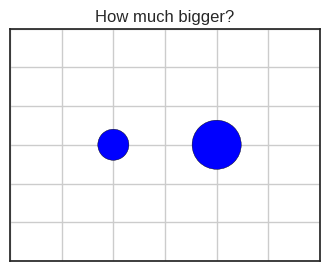

In [84]:
plt.figure(figsize=(4,3))
plt.scatter([1,1.1],[1,1],s=[500,1250])
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
plt.grid("on")
plt.title("How much bigger?")

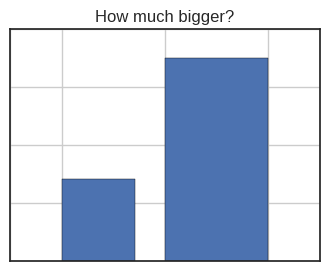

In [85]:
plt.figure(figsize=(4,3))
plt.bar([1,2],[2*np.sqrt(0.5),3.5],width=[np.sqrt(0.5),1])
plt.yticks([1,2,3,4])
plt.xticks([0.5,1,2,3,3.5])
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
plt.grid("on")
plt.title("How much bigger?")

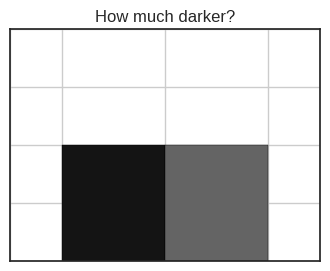

In [86]:
plt.figure(figsize=(4,3))
plt.bar([1,2],[2,2],width=[1,1],color=[(20/255,20/255,20/255),(100/255,100/255,100/255)])
plt.yticks([1,2,3,4])
plt.xticks([0.5,1,2,3,3.5])
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
plt.grid("on")
plt.title("How much darker?")

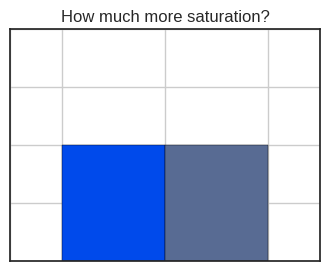

In [87]:
plt.figure(figsize=(4,3))
plt.bar([1,2],[2,2],width=[1,1],color=[(0/255,74/255,235/255),(88/255,107/255,147/255)])
plt.yticks([1,2,3,4])
plt.xticks([0.5,1,2,3,3.5])
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
plt.grid("on")
plt.title("How much more saturation?")

---

## 2.2 Information about ONE quantitative variable
- Distributions: Histogram, violinplot and box-plot
- Mean values: Bar plot

### 2.2.1 DISTRIBUTIONS
- The distribution is the relationship between the value and the frequency (value 7, frequency 100 times)
- We usually plot the relative frequency (the fraction) instead of the value
- When we do this, the area below the curve is equal to 1.

- When are we interested on this:
    - In the description phase of our research, to see how our data looks like
    - To see if the assumptions of our statistics hold (histograms)
    - Many times we want to plot the distributions (or a summary of it) of a quantitative variable in terms of a qualitative variable (for instance, distribution of GDP in many countries)
    
 
    

In [88]:
#Data example: If you draw two dice, then you will get a lot of 7s, many 6s and 8s, some 5s and 9s, a few 4s and 10st, very few32s and 11st and almost no 2s ans 12st.
#This data is discrete

from collections import Counter

#Roll two dices 10000 times
dice_rolls = np.random.randint(1,7,10000) + np.random.randint(1,7,10000)
#Count the number of each element to create the distribution
Counter(dice_rolls)

Counter({2: 287,
         3: 558,
         4: 833,
         5: 1087,
         6: 1321,
         7: 1715,
         8: 1399,
         9: 1107,
         10: 868,
         11: 526,
         12: 299})

### 2.2.1.1 HISTOGRAM
- A representation of the visualization
- It's not a good idea to have many of this 

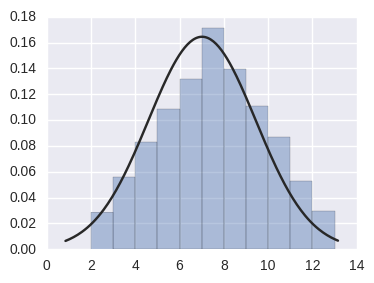

In [89]:
from scipy.stats import norm,lognorm,expon

#seaborn defaults
sns.set()
#And we can visualize it with a histogram
plt.figure(figsize=(4,3))

#Histogram
sns.distplot(dice_rolls, fit=norm, kde=False,rug=False,bins=range(2,14),norm_hist=True)

### 2.2.1.2 BOX-PLOT
- A summary of the distribution. 
- They show if the means of two\ distributions are different or not



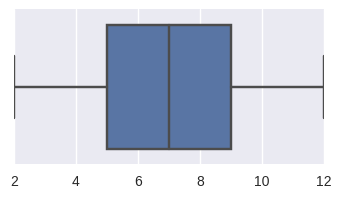

In [90]:
#And we can visualize it with a histogram
plt.figure(figsize=(4,2))
sns.boxplot(dice_rolls,orient="h")

### 2.2.1.2 VIOLIN-PLOT
- A summary of the distribution
- Only makes sense for CONTINUOUS data


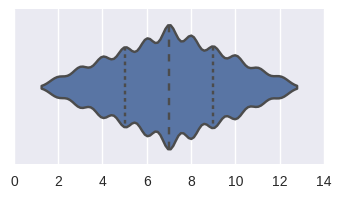

In [91]:
#And we can visualize it with a histogram
plt.figure(figsize=(4,2))
sns.violinplot(dice_rolls,orient="h",inner="quartiles")

## 2.2 BAR-PLOT
- When are we interested on this:
    - We only are interested in one individual value either because 
        - We only have the value (e.g. the number of car accidents)
        - We are not so interested in the distribution and we don't want to clutter the plot. E.g. the mean number of car accidents. We need error bars in this case!
        
- This plot only make sense if we have many categories

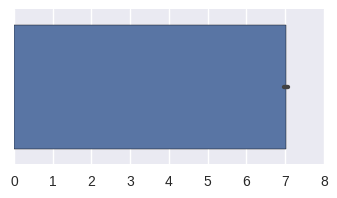

In [92]:
plt.figure(figsize=(4,2))
#mean is the default
sns.barplot(dice_rolls,estimator=np.mean)

## 2.2 Information about ONE quantitative variable + ONE or more qualitative variables
- Histogram, violinplot and box-plot
- Bar plot

In [93]:
df = read_our_csv()
df["C"] = df["METRO_ID"].apply(lambda x: x[:2])
df = df.loc[df["C"] == "IT"]
df.head()

VAR,METRO_ID,Metropolitan areas,Year,CO2_PC,ENTROPY_1000M,EQU_HOU_DISP_INC,GDP_PC,GINI_INC,GREEN_AREA_PC,LABOUR_PRODUCTIVITY,PCT_INTENSITY,POP_DENS,SPRAWL,UNEMP_R,C
1530,IT001,Rome,2000,10.36,NaN,NaN,47836.13,NaN,251.93,122766.44,0.33,651.06,NaN,11.05,IT
1531,IT001,Rome,2001,NaN,NaN,NaN,48928.59,NaN,250.04,124464.71,0.38,655.97,NaN,9.98,IT
1532,IT001,Rome,2002,NaN,NaN,NaN,49323.37,NaN,248.15,122641.81,0.36,660.98,NaN,7.93,IT
1533,IT001,Rome,2003,NaN,NaN,NaN,48662.53,NaN,246.25,120883.80,0.46,666.08,NaN,8.03,IT
1534,IT001,Rome,2004,NaN,NaN,NaN,50172.53,NaN,244.34,122254.22,0.50,671.29,NaN,7.47,IT


### 2.2.1.1 BOX-PLOT

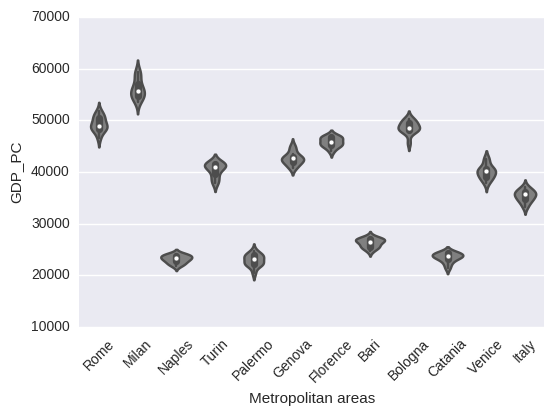

In [96]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Metropolitan areas",y="GDP_PC",data=df,color="gray")
plt.xticks(rotation=45)
plt.show()

### 2.2.1.2 VIOLIN-PLOT

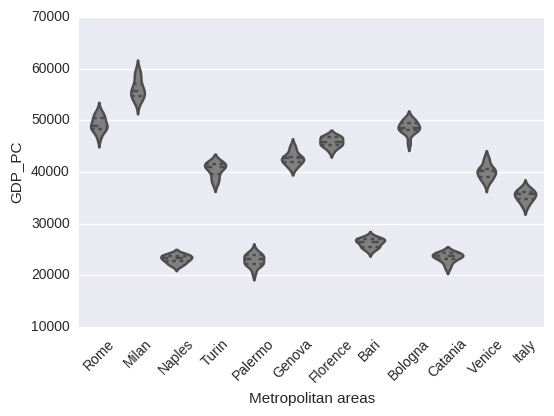

In [47]:
plt.figure(figsize=(6,4))

sns.violinplot(x="Metropolitan areas",y="GDP_PC",data=df,color="gray",inner="quartiles")
plt.xticks(rotation=45)
plt.show()

### 2.2.1.3 BAR-PLOT

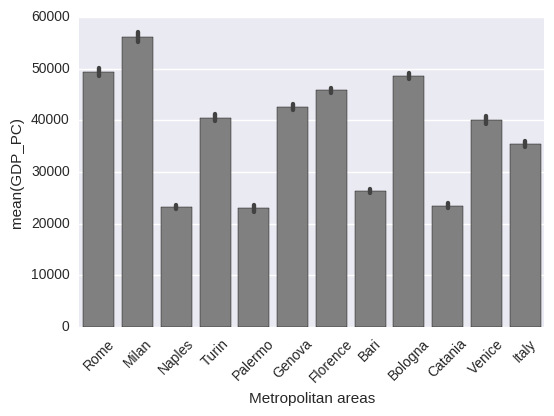

In [48]:
plt.figure(figsize=(6,4))

sns.barplot(x="Metropolitan areas",y="GDP_PC",data=df,color="gray")
plt.xticks(rotation=45)
plt.show()

## We can add an extra variable with hue (example for boxplot but it works for all)

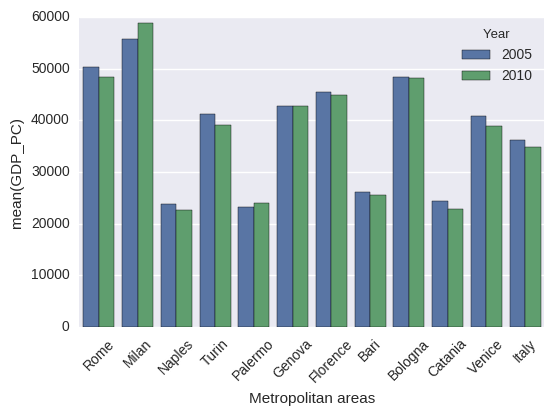

In [49]:
df_2010_15 = df.loc[df["Year"].isin([2005,2010]),:]
plt.figure(figsize=(6,4))
sns.barplot(x="Metropolitan areas",y="GDP_PC",data=df_2010_15,hue="Year")
plt.xticks(rotation=45)
plt.show()

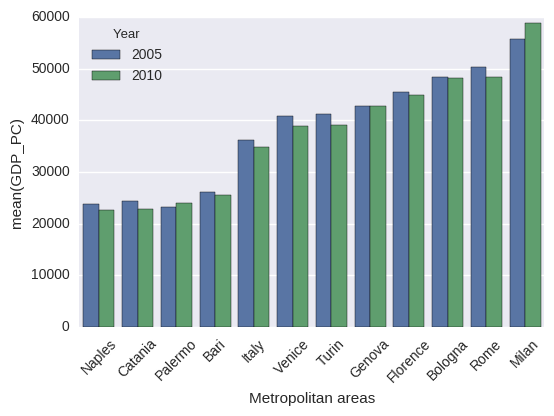

In [50]:
df_2010_15 = df.loc[df["Year"].isin([2005,2010]),:]
df_2010_15 = df_2010_15.sort_values(by="GDP_PC")
plt.figure(figsize=(6,4))
sns.barplot(x="Metropolitan areas",y="GDP_PC",data=df_2010_15,hue="Year")
plt.xticks(rotation=45)
plt.show()

## 2.3 Information about TWO quantitative variables
- Scatter plot
- Line plot
- Heatmap

### 2.3.1 SCATTER PLOT
This is the most useful plot. 
- Used to visualize relationship between two variables

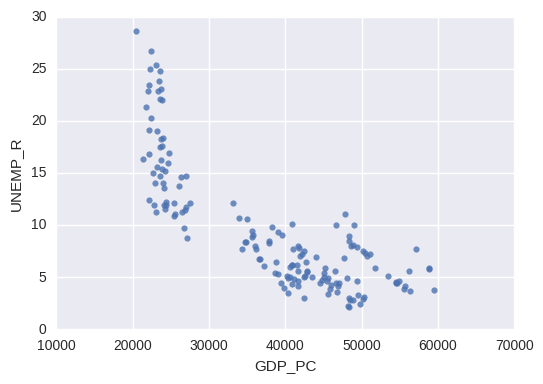

In [51]:
sns.lmplot(x="GDP_PC",y="UNEMP_R",data=df, fit_reg=False,size=4,aspect=1.4)
plt.show()


** And we can add a trendline **
- default: Fit linear
- order=2: Fit 2nd order polynomial
- logx=True -> Fit exponential
- robust=True -> Fit linear with outliers
- lowess=True -> trend line
- logistic=True -> fit logistic (y must be between 0 and 1)

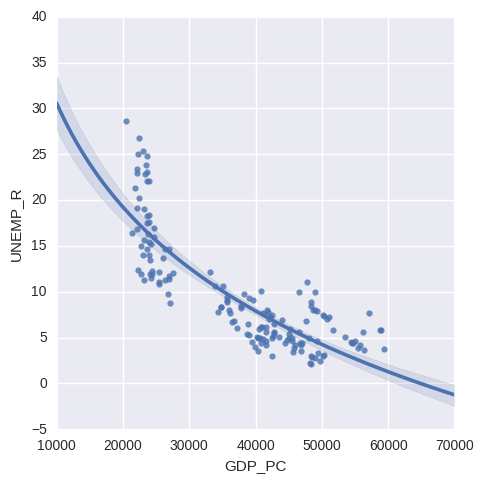

In [52]:
plt.figure(figsize=(6,4))
sns.lmplot(x="GDP_PC",y="UNEMP_R",data=df, logx=True)
plt.show()

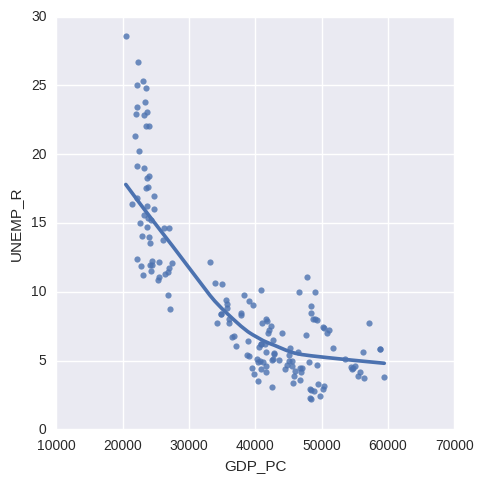

In [53]:
plt.figure(figsize=(6,4))
sns.lmplot(x="GDP_PC",y="UNEMP_R",data=df, lowess=True)
plt.show()

** And we can add the marginal distributions **

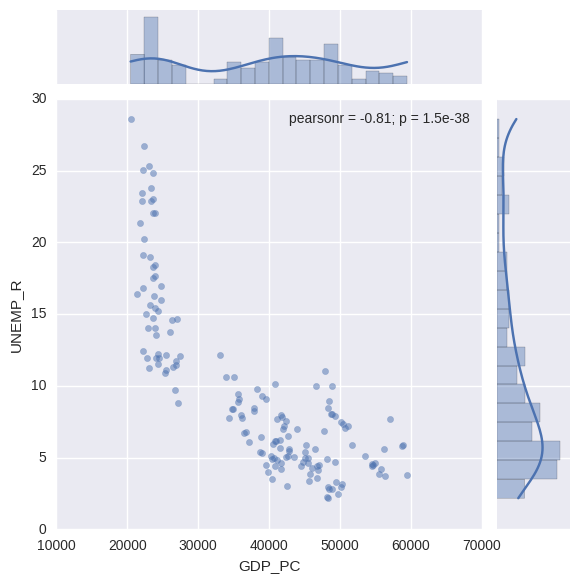

In [54]:

sns.jointplot(x="GDP_PC", y="UNEMP_R", data=df,
              marginal_kws=dict(bins=20, rug=False, kde=True, kde_kws={"cut":0}),size=6,alpha=0.5)

** And we can bin the data**

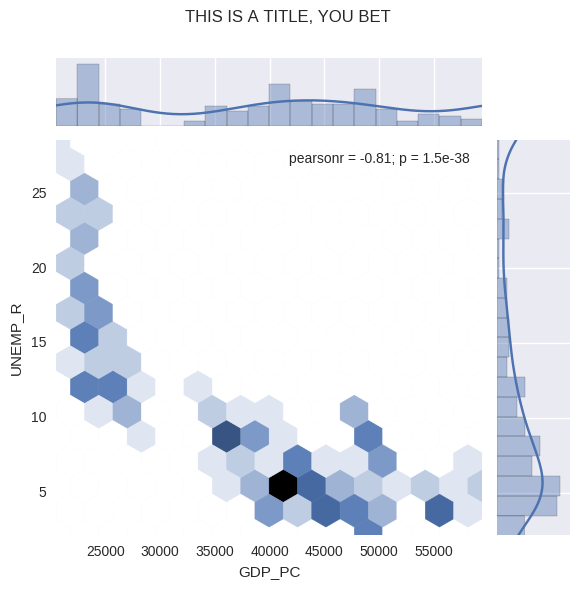

In [55]:
sns.jointplot(x="GDP_PC", y="UNEMP_R", data=df,kind="hex",
              marginal_kws=dict(bins=20, rug=False, kde=True, kde_kws={"cut":0}), gridsize = 15,size=6)

plt.subplots_adjust(top=0.9)
plt.suptitle('THIS IS A TITLE, YOU BET') # can also get the figure from plt.gcf()

### 2.3.1 LINE PLOT
This is the most useful plot when the x variable is time. 
- Used to visualize relationship between two variables, one of them time

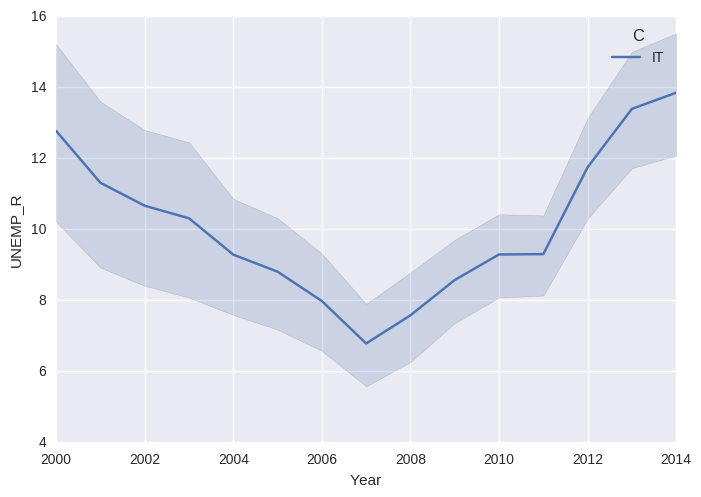

In [56]:
sns.tsplot(time="Year",unit="Metropolitan areas",value="UNEMP_R",condition="C",data=df.reset_index(),estimator=np.mean)

In [57]:
sns.tsplot?

## 2.4 Information about TWO quantitative variables + ONE or more qualitative variables
- Scatter plot
- Scatter matrix
- Heatmap: Correlation matrix

### 2.4.1 SCATTER PLOT


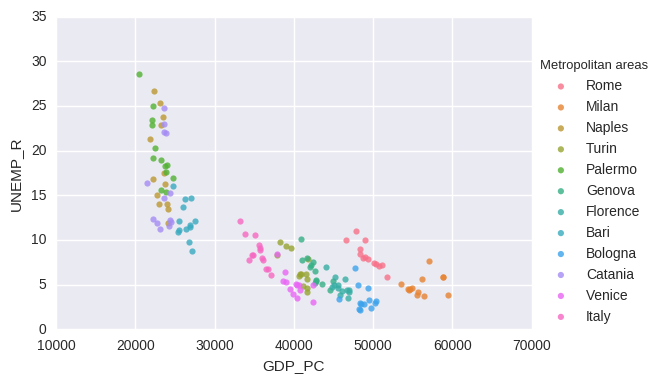

In [58]:
sns.lmplot(x="GDP_PC",y="UNEMP_R",hue="Metropolitan areas",data=df, fit_reg=False,size=4,aspect=1.4)
plt.show()


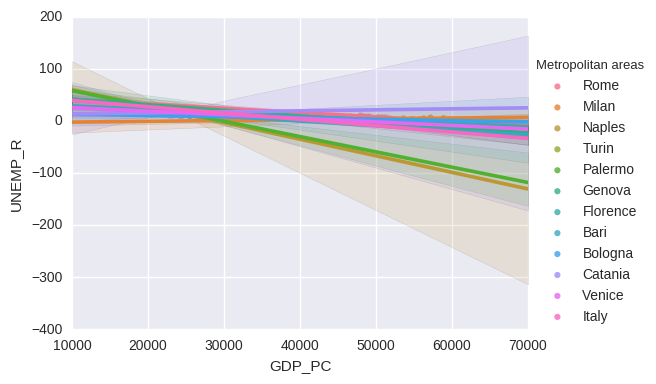

In [59]:
sns.lmplot(x="GDP_PC",y="UNEMP_R",hue="Metropolitan areas",data=df, fit_reg=True,size=4,aspect=1.4)
plt.show()


### 2.4.2 LINE PLOT
This is the most useful plot when the x variable is time. 
- Used to visualize relationship between two variables, one of them time

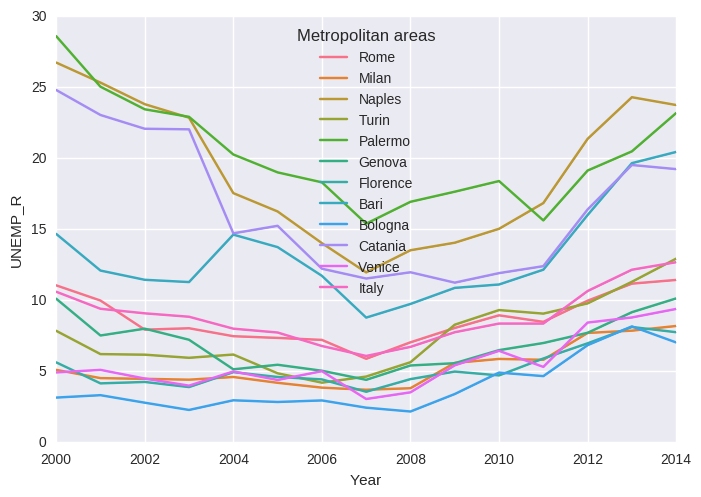

In [60]:
sns.tsplot(time="Year",unit="Metropolitan areas",value="UNEMP_R",condition="Metropolitan areas",data=df.reset_index())
plt.savefig("annoying_legend.pdf")

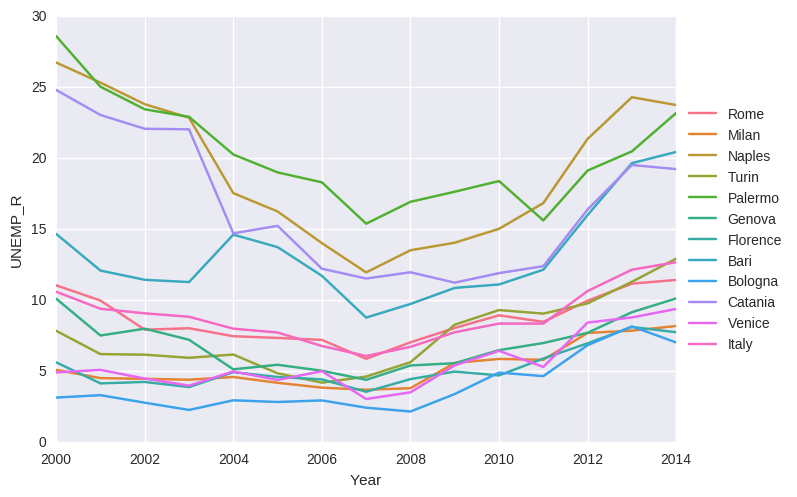

In [61]:
#How to move the legend out
sns.tsplot(time="Year",unit="Metropolitan areas",value="UNEMP_R",condition="Metropolitan areas",data=df.reset_index())
sns.plt.legend(loc='center left',bbox_to_anchor=(1,0.5))

### 2.4.3 SCATTER MATRIX
This is useful to see the relationship between many variables

In [62]:
df_subset = df.loc[:,["Metropolitan areas","CO2_PC","GDP_PC","GREEN_AREA_PC","POP_DENS","UNEMP_R"]].dropna()


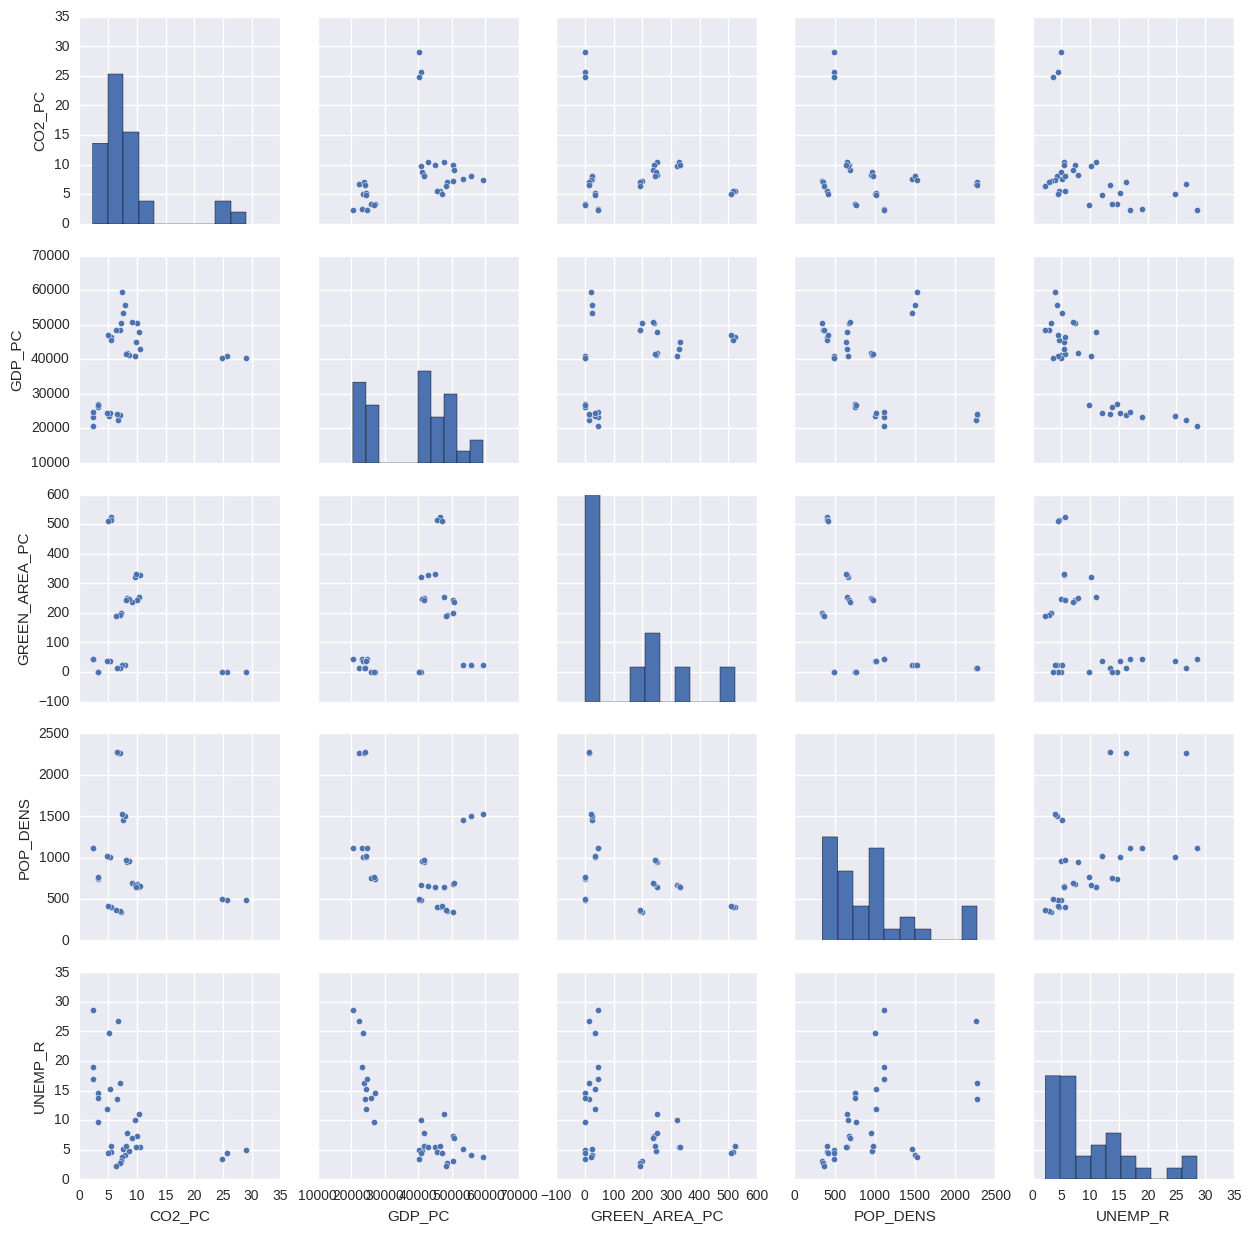

In [63]:
sns.pairplot(df_subset.dropna())#,hue="Metropolitan areas")


### 2.4.4 HEATMAP
This is useful to see the correlation between many variables

In [64]:
df_subset.head()

VAR,Metropolitan areas,CO2_PC,GDP_PC,GREEN_AREA_PC,POP_DENS,UNEMP_R
1530,Rome,10.36,47836.13,251.93,651.06,11.05
1535,Rome,9.98,50376.28,242.42,676.60,7.35
1538,Rome,9.11,50748.42,236.61,693.20,7.04
1545,Milan,7.61,53499.91,24.21,1458.80,5.10
1550,Milan,8.01,55725.72,23.59,1496.90,4.19


In [65]:
corr = df_subset.corr()
corr

VAR,CO2_PC,GDP_PC,GREEN_AREA_PC,POP_DENS,UNEMP_R
VAR,,,,,
CO2_PC,1.000000,0.294134,-0.124358,-0.255233,-0.414950
GDP_PC,0.294134,1.000000,0.485565,-0.399848,-0.827301
GREEN_AREA_PC,-0.124358,0.485565,1.000000,-0.504489,-0.425216
POP_DENS,-0.255233,-0.399848,-0.504489,1.000000,0.515049
UNEMP_R,-0.414950,-0.827301,-0.425216,0.515049,1.000000


In [66]:
corr**2

VAR,CO2_PC,GDP_PC,GREEN_AREA_PC,POP_DENS,UNEMP_R
VAR,,,,,
CO2_PC,1.000000,0.086515,0.015465,0.065144,0.172184
GDP_PC,0.086515,1.000000,0.235774,0.159878,0.684426
GREEN_AREA_PC,0.015465,0.235774,1.000000,0.254509,0.180809
POP_DENS,0.065144,0.159878,0.254509,1.000000,0.265276
UNEMP_R,0.172184,0.684426,0.180809,0.265276,1.000000


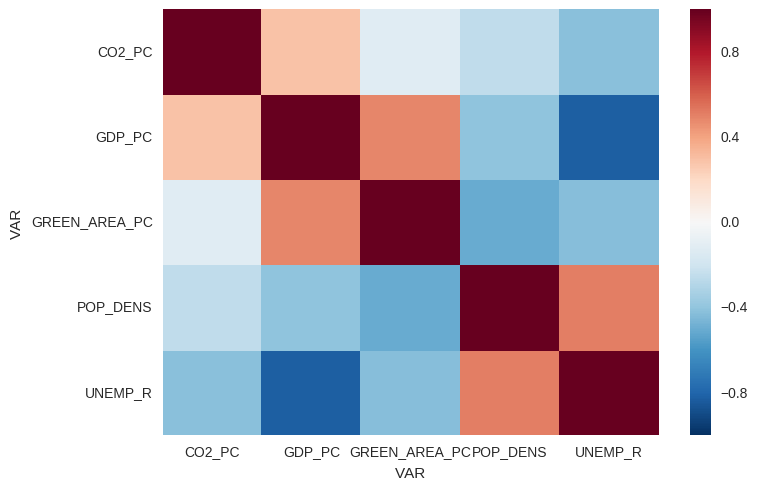

In [69]:
corr = df_subset.corr()
sns.heatmap(corr)

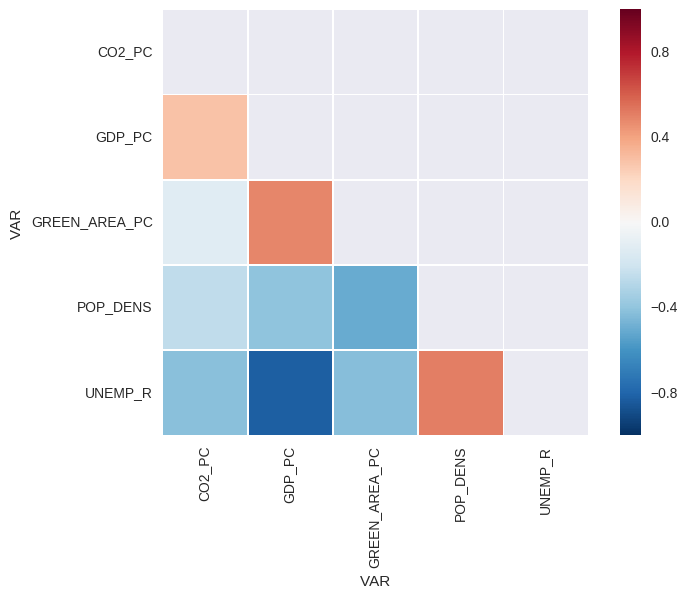

In [41]:
# Compute the correlation matrix
corr = df_subset.corr()

# Generate a mask for the upper triangle (hide the upper triangle)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, square=True,linewidths=.5)

plt.show()

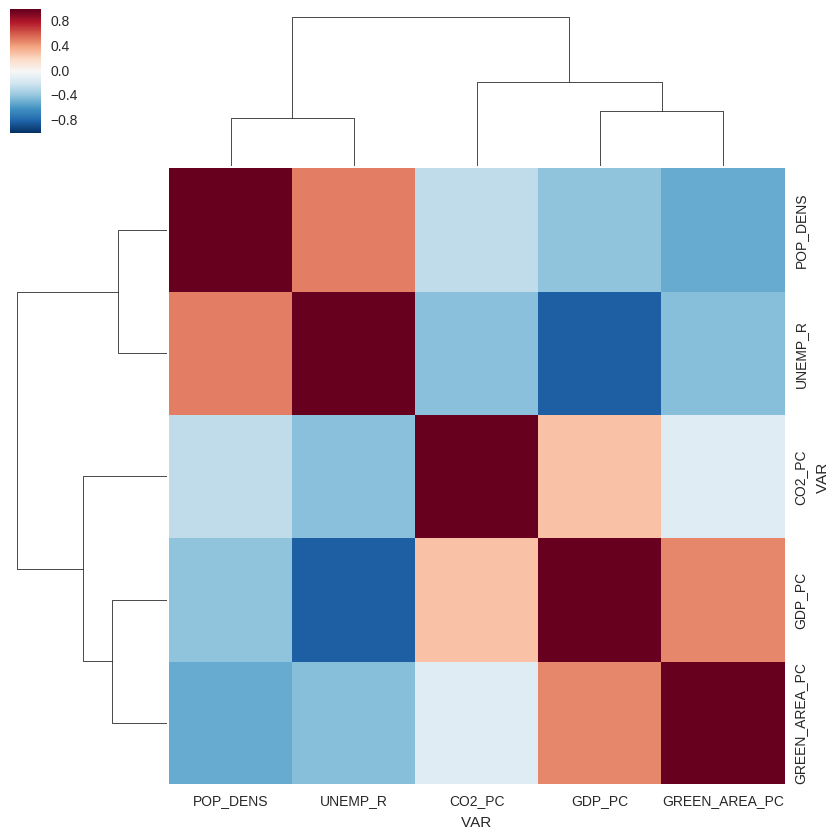

In [70]:
corr = df_subset.corr()
sns.clustermap(corr)

## 2.5 Network data
Use gephi: https://gephi.org/

This is what we do at the corpnet group (corpnet.uva.nl)

In [62]:
Image(url="images/newtork.png")

## 2.6 When to use log scale
- Increase visibility (too many values with small values)
- **When we are plotting ratios or percentages** (because a ratio of 5/1 and a ratio of 1/5 look equally far from 1 in log scale)
- In a distribution: When we are trying to show that our distribution follows a exponential (lin-log scale), lognormal (log-lin scale) or power-law (log-log scale) distribution

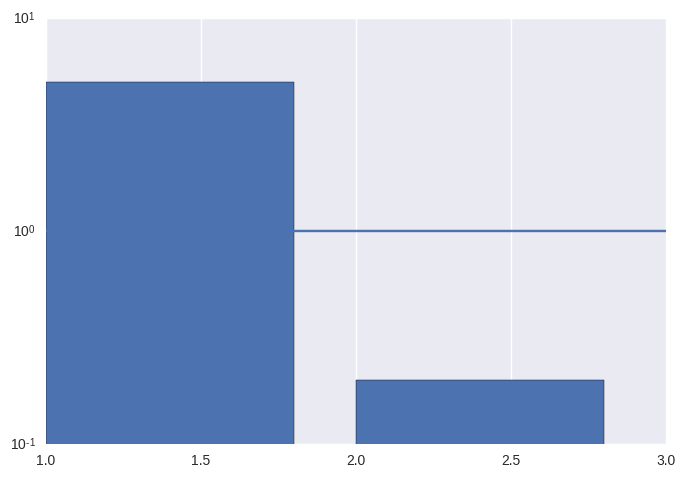

In [43]:

plt.bar([1,2],[5,0.2])
plt.plot([1,3],[1,1])
plt.yscale("log")

In [ ]:
from pandas.plotting import parallel_coordinates,autocorrelation_plot